In [7]:
%run IDM_helper_functions.ipynb

## LCA parameter recovery

In [19]:
# Training data
num_simulations = 500000
#[0,0.5] for ∆I, [0,2] for I, [0,14] for κ and β, [0,1] for Z, and [0,1]
#prior = utils.BoxUniform(low=[0.05,0.05,1,1], high=[0.3,0.25,8,8])

prior = utils.BoxUniform(low=[0.05,0.05,1,0.2], high=[0.3,0.5,8,1])

parameters = prior.sample((num_simulations,))
x = simul_LCA_all_param(np.array(parameters))

In [20]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()


 Neural network successfully converged after 59 epochs.

In [21]:
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")

In [30]:
# inference with different x_o that has 10 trials
#torch.manual_seed(41)
num_trials = 1000
num_samples = 200
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_LCA_all_param(np.array(parameters_o.repeat(num_trials, 1)))

In [31]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/2100 [00:00<?, ?it/s]

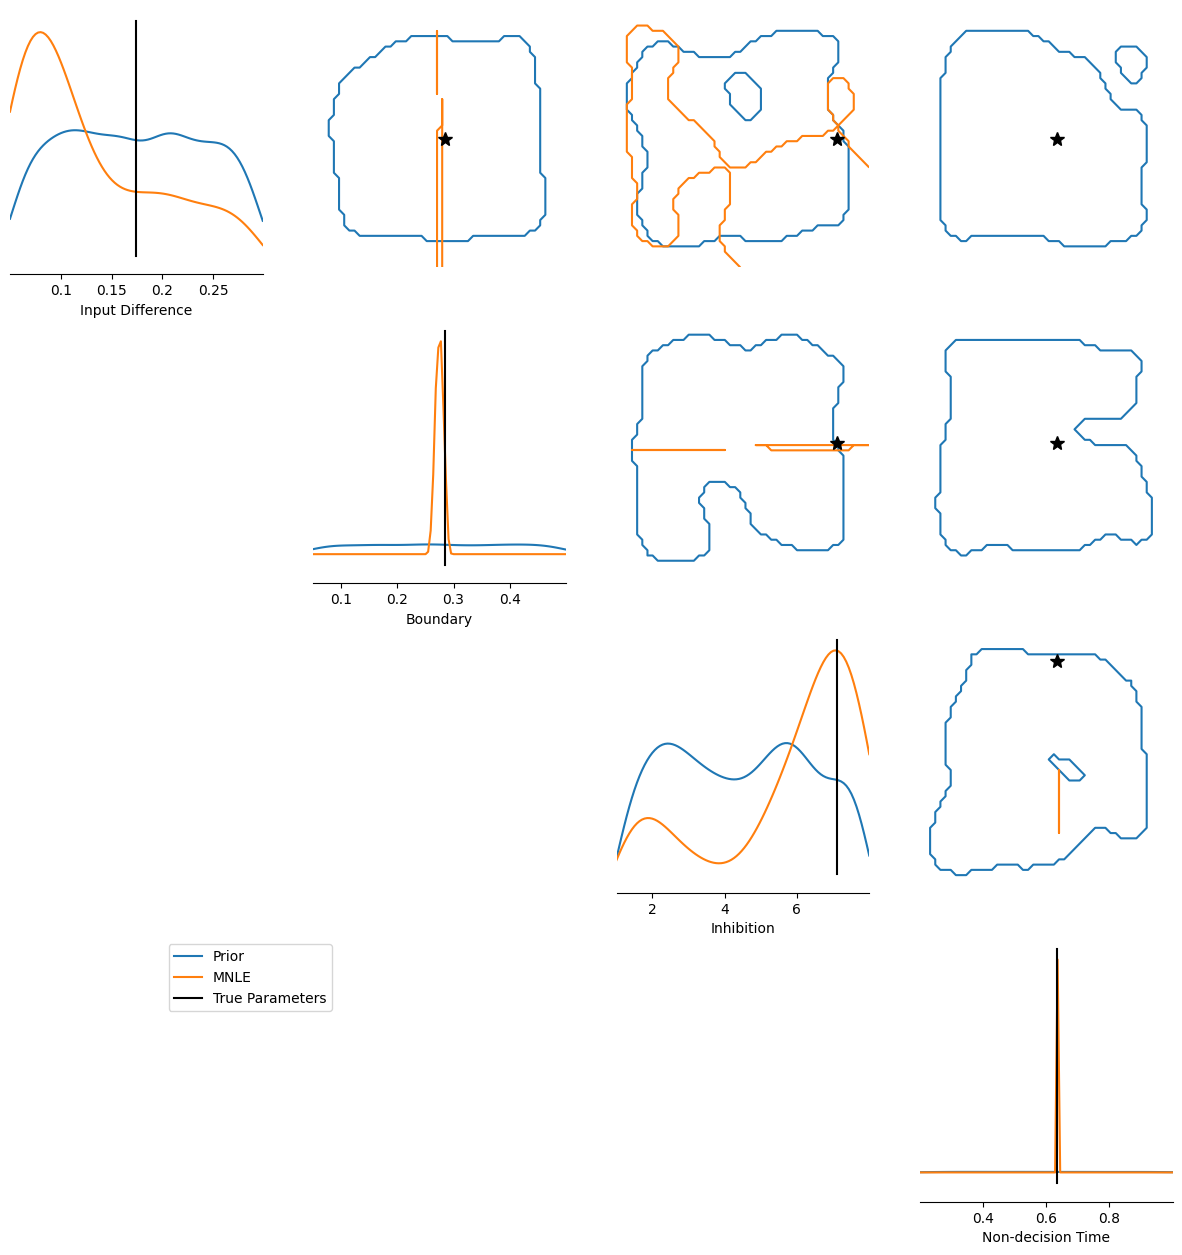

In [32]:
pair_plot(prior, mnle_samples, parameters_o, figsize = (15,15), contour = 0.7, 
          labels=['Input Difference', 'Boundary','Inhibition', 'Non-decision Time'])

In [17]:
parameters = prior.sample((30,))
parameters.shape

torch.Size([30, 4])

## Simulate from ICA and fit with ICA

In [33]:
parameters = prior.sample((30,))

n_trials = 500
num_samples = 200
par_fitted = np.zeros((30,4))

In [35]:
for i in range(30):
    print(i)
    LCA_o = simul_LCA_all_param(np.tile(parameters[i,:], (n_trials,1))) # simulate LCA data
    print(LCA_o[0:5,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
tensor([[0.3340, 1.0000],
        [0.3610, 1.0000],
        [0.3890, 0.0000],
        [0.3790, 1.0000],
        [0.3600, 1.0000]])
[0.06409123 0.2182225  6.3186126  0.3174072 ]
1
tensor([[0.3332, 1.0000],
        [0.3282, 0.0000],
        [0.3642, 1.0000],
        [0.3622, 0.0000],
        [0.3372, 0.0000]])
[0.29834977 0.14112759 1.5766425  0.3221959 ]
2
tensor([[0.9498, 1.0000],
        [0.9468, 0.0000],
        [0.9448, 0.0000],
        [0.9438, 1.0000],
        [0.9768, 1.0000]])
[0.15789205 0.1280361  1.3986008  0.9368893 ]
3
tensor([[0.8161, 0.0000],
        [0.8121, 0.0000],
        [0.8381, 0.0000],
        [0.8041, 1.0000],
        [0.8111, 0.0000]])
[0.05388896 0.18188027 2.3145623  0.79593444]
4
tensor([[0.4588, 1.0000],
        [0.4578, 1.0000],
        [0.4578, 1.0000],
        [0.4588, 0.0000],
        [0.4568, 0.0000]])
[0.18658333 0.05089121 4.94114    0.45457995]
5
tensor([[0.4816, 1.0000],
        [0.4736, 0.0000],
        [0.4746, 0.0000],
        [0.5186, 0.0000],

KeyboardInterrupt: 

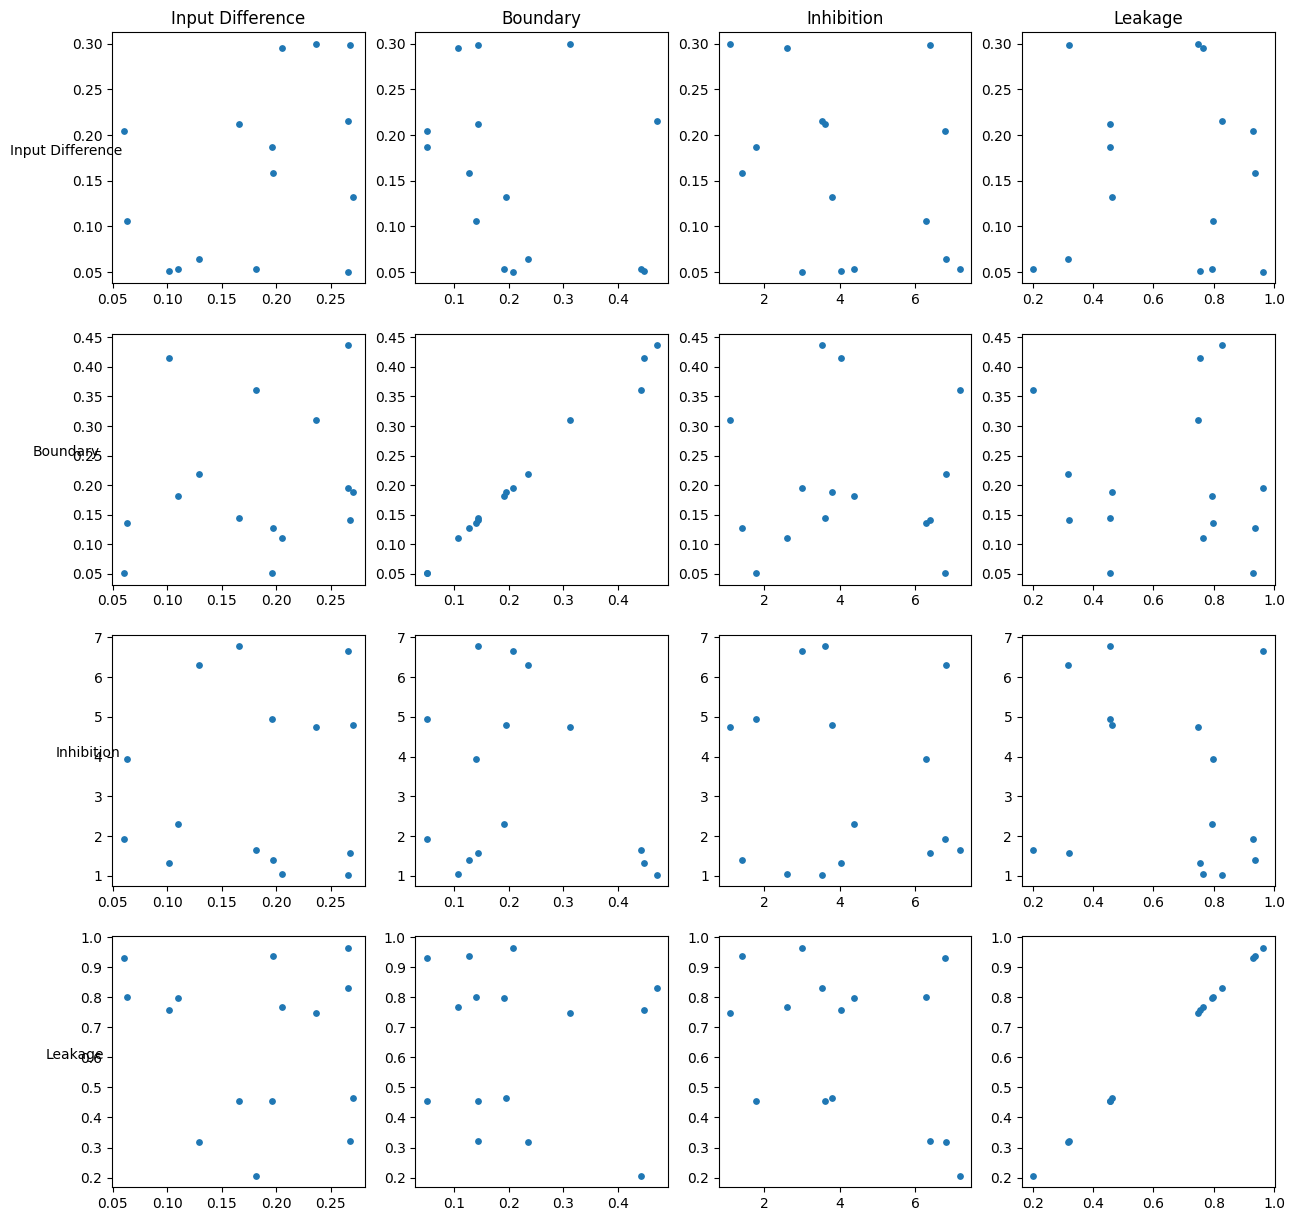

In [36]:
## n_trials = 1000
par_labels = ['Input Difference', 'Boundary','Inhibition', 'Leakage']
par_fitted_labels = ['Input Difference', 'Boundary','Inhibition', 'Leakage']
sim_fit_plot_all(parameters[0:15], par_fitted[0:15], par_labels, par_fitted_labels, s = 15, figsize=(15,15))

## Simulate from IDM and fit with ICA

In [18]:
Cs = np.random.uniform(low=0, high=0.5, size=30)
hs = np.random.uniform(low=0.2, high=0.4, size=30)
Inhs = np.random.uniform(low=8200, high=8600, size=30)
Excs = np.random.uniform(low=52300, high=52700, size=30)

#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 200
num_samples = 100
par_fitted = np.zeros((30,3))

In [19]:
for i in range(len(Cs)):
    print(i)
    IDM_o = simul_IDM_CG_inh_pos(np.tile((Cs[i], hs[i], Inhs[i], Excs[i]), (n_trials,1))) # simulate IDM data
    print(IDM_o[0:5,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(IDM_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
sim0
tensor([[0.6040, 0.0000],
        [0.6290, 0.0000],
        [0.6160, 0.0000],
        [0.5830, 0.0000],
        [0.6520, 0.0000]])
[0.49832803 0.8016558  5.9934206 ]
1
sim0
tensor([[0.6500, 0.0000],
        [0.6260, 0.0000],
        [0.6670, 0.0000],
        [0.6450, 1.0000],
        [0.6440, 1.0000]])
[0.49999422 0.9728365  5.9983606 ]
2
sim0
tensor([[0.6090, 0.0000],
        [0.5970, 0.0000],
        [0.6110, 0.0000],
        [0.6000, 0.0000],
        [0.5990, 0.0000]])
[0.49823552 0.70273894 5.994752  ]
3
sim0
tensor([[0.5920, 0.0000],
        [0.6100, 0.0000],
        [0.6410, 0.0000],
        [0.6260, 0.0000],
        [0.6420, 0.0000]])
[0.4997586 0.8947196 5.9965606]
4
sim0
tensor([[0.6440, 0.0000],
        [0.6280, 0.0000],
        [0.6530, 0.0000],
        [0.6110, 0.0000],
        [0.5980, 0.0000]])
[0.49905163 0.923246   5.9908404 ]
5
sim0
tensor([[0.5920, 0.0000],
        [0.5910, 0.0000],
        [0.5760, 0.0000],
        [0.5730, 0.0000],
        [0.5600, 0.0000]])


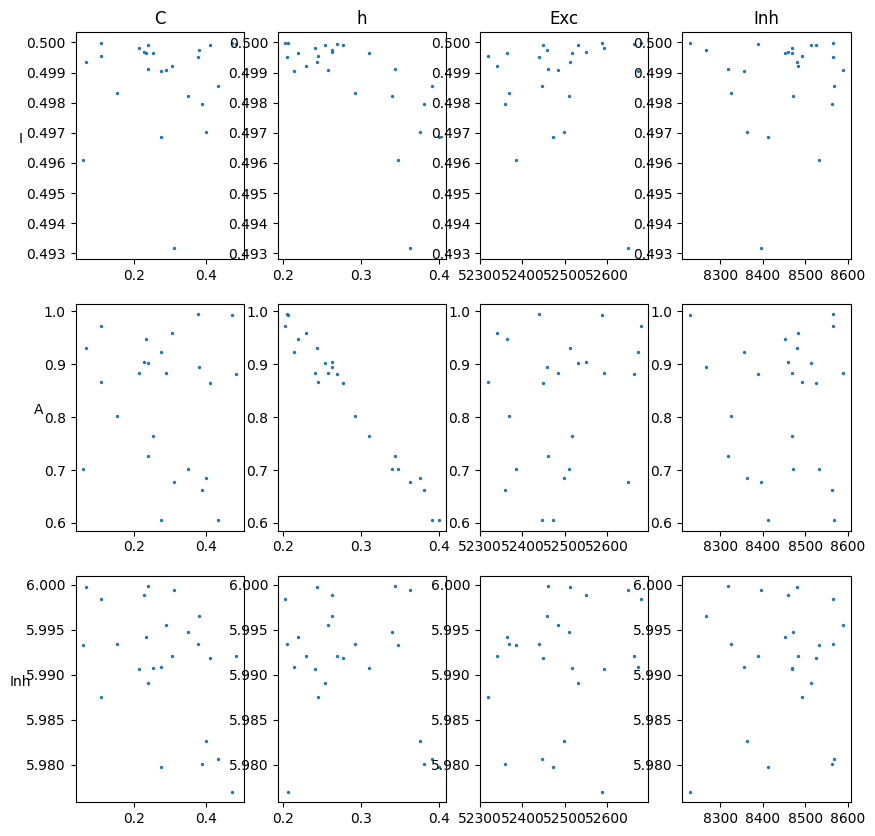

In [20]:
sim_fit_plot_IDM_LCA(Cs, hs, Excs, Inhs, par_fitted, sim_num = 25)

## Train NN for IDM 

In [148]:
# Training data
num_simulations = 40000
prior = utils.BoxUniform(low=[0,0.2,6000], high=[0.5,0.6,8000])

parameters = prior.sample((num_simulations,))
x = simul_IDM_CG_inh(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000


In [149]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")


 Neural network successfully converged after 70 epochs.

## IDM parameter recovery

In [ ]:
# inference with different x_o that has 10 trials
num_trials = 100
num_samples = 100
parameters_o = prior.sample((1,))
#x_o = simul_IDM_mult_trial(np.array(parameters_o))
x_o = simul_IDM_CG_inh(np.array(parameters_o.repeat(num_trials, 1)))

In [ ]:
mnle_posterior = trainer.build_posterior(mnle, prior)

mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

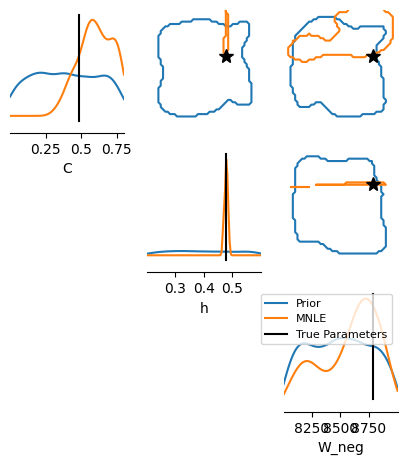

In [95]:
#pair_plot(prior, mnle_samples, parameters_o, 
contour = 0.7

fig, ax = pairplot(
    [
        prior.sample((1000,)),
        mnle_samples,
    ],
    points=parameters_o,
    diag="kde",
    upper="contour",
    kde_offdiag=dict(bins=50),
    kde_diag=dict(bins=100),
    contour_offdiag=dict(levels=[contour]),
    points_colors=["k"],
    points_offdiag=dict(marker="*", markersize=10),
    labels=['C', 'h','W_neg'],
    figsize=(5, 5)
)

#plt.sca(ax[1, 1])
plt.legend(
    ["Prior", "MNLE", 'True Parameters'],
    #frameon=False,
    fontsize=8,
    loc = 1
);

## Simulate from LCA and fit with IDM

In [150]:
Is = np.random.uniform(low=0.1, high=4, size=30)
As = np.random.uniform(low=0.4, high=0.8, size=30)
Inhs = np.random.uniform(low=0.1, high=4, size=30)
#Ters = np.random.uniform(low=0.2, high=0.8, size=30)

n_trials = 500
num_samples = 100
par_fitted = np.zeros((30,3))

In [151]:
for i in range(len(Is)):
    print(i)
    LCA_o = simul_LCA(np.tile((Is[i], As[i], Inhs[i]), (n_trials,1))) # simulate IDM data
    print(LCA_o[0:5,:])
    #prior = utils.BoxUniform(low=[0,0.2,0.1], high=[0.6,0.6,0.6])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)
    
    

0
tensor([[1.4020, 0.0000],
        [0.8870, 0.0000],
        [0.5680, 1.0000],
        [0.6120, 1.0000],
        [0.7680, 0.0000]])
[2.0425561e-01 4.0492842e-01 6.8782568e+03]
1
tensor([[0.5740, 0.0000],
        [0.6490, 0.0000],
        [0.5950, 0.0000],
        [0.6080, 0.0000],
        [0.6730, 0.0000]])
[3.1178629e-01 4.0015432e-01 6.7044673e+03]
2
tensor([[0.6520, 0.0000],
        [0.6730, 0.0000],
        [0.5450, 0.0000],
        [0.6270, 0.0000],
        [0.5610, 0.0000]])
[3.2582918e-01 3.7295932e-01 6.6481040e+03]
3
tensor([[0.7700, 1.0000],
        [0.5440, 1.0000],
        [0.8770, 0.0000],
        [0.6530, 1.0000],
        [0.8140, 0.0000]])
[3.1458724e-01 3.6899114e-01 6.6702173e+03]
4
tensor([[0.7770, 0.0000],
        [0.6260, 0.0000],
        [0.5700, 0.0000],
        [0.5200, 0.0000],
        [0.5620, 0.0000]])
[3.3504364e-01 4.6827739e-01 6.6119951e+03]
5
tensor([[0.5310, 0.0000],
        [0.5920, 0.0000],
        [0.7040, 0.0000],
        [0.6560, 0.0000],
        [

Text(0, 0.5, 'W_neg')

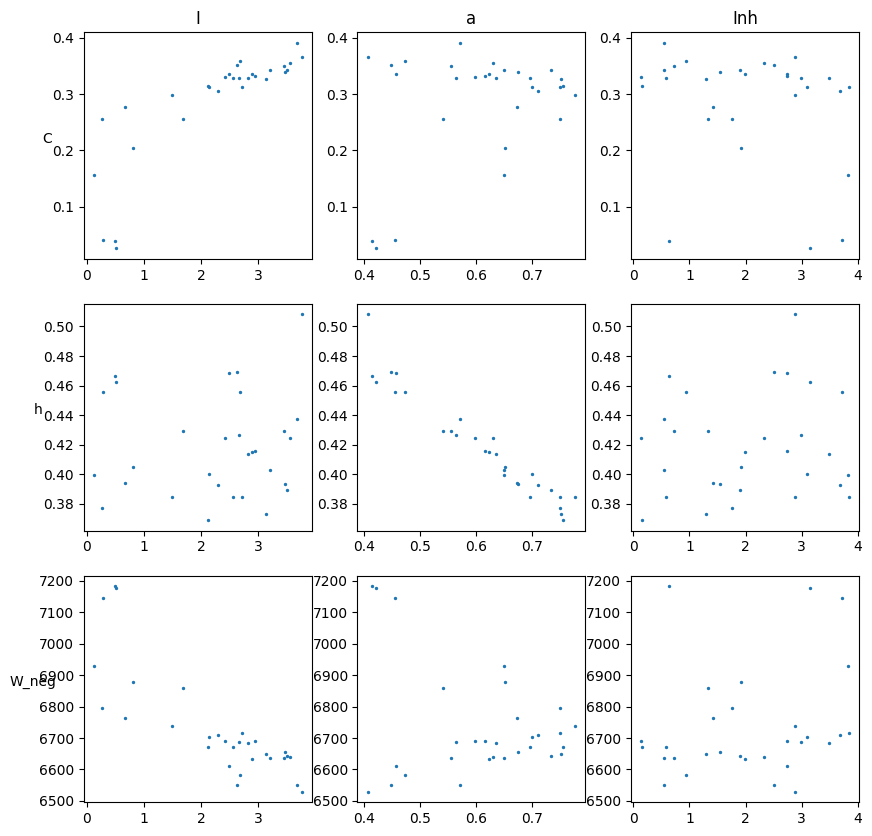

In [152]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)

Text(0, 0.5, 'W_neg')

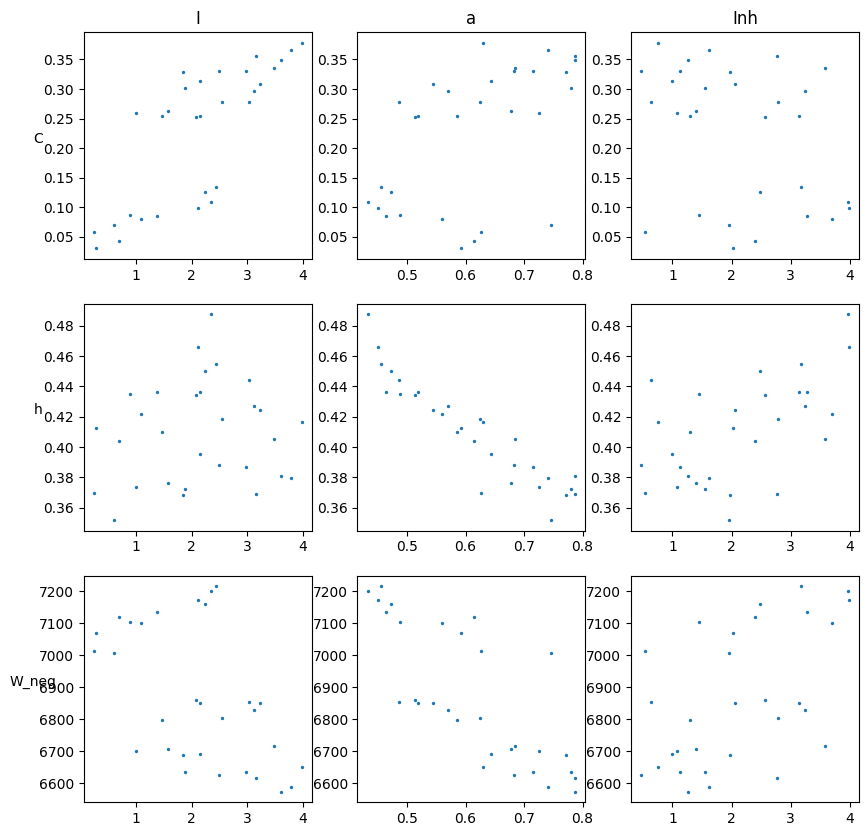

In [147]:
sim_num = 30
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))

ax1.scatter(Is[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax2.scatter(As[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax3.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,0], s = 2)
ax4.scatter(Is[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax5.scatter(As[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax6.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,1], s = 2)
ax7.scatter(Is[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax8.scatter(As[0:sim_num], par_fitted[0:sim_num,2], s = 2)
ax9.scatter(Inhs[0:sim_num], par_fitted[0:sim_num,2], s = 2)

ax1.set_title("I")
ax2.set_title("a")
ax3.set_title("Inh")

ax1.set_ylabel("C", rotation=0)
ax4.set_ylabel("h", rotation=0)
ax7.set_ylabel("W_neg", rotation=0)